CS20B1034
Subham Kumar Maharana

To run it just copy paste the whole code in google colab

If not on colab convert cv2_imshow to cv2.imshow and change file uploading methods

Saving #c82d36.jpeg to #c82d36.jpeg
Enter Colors :
 1 - Red 
 2 - Blue 
 3 - Green 
 4 - Black 
 5 - Insert Your Hash Code 
 Select your Option : 5

	 Recommended Website for Hash Code : https://html-color.codes/image


	  Enter the hash code of the color you want to remove (e.g., #FF0000): #c82d36

	  Color in BGR :  [[[ 54  45 200]]]

	  Color in HSV :  [[[178 198 200]]]

	  Enter the threshold : (e.g., 10,20): 10


	  HSV Range for mask from [168  50  50]  to  [179 255 255]


	  Enter Structuring element side for mask Dilation : 4



			                                                   _________Original_Image___________





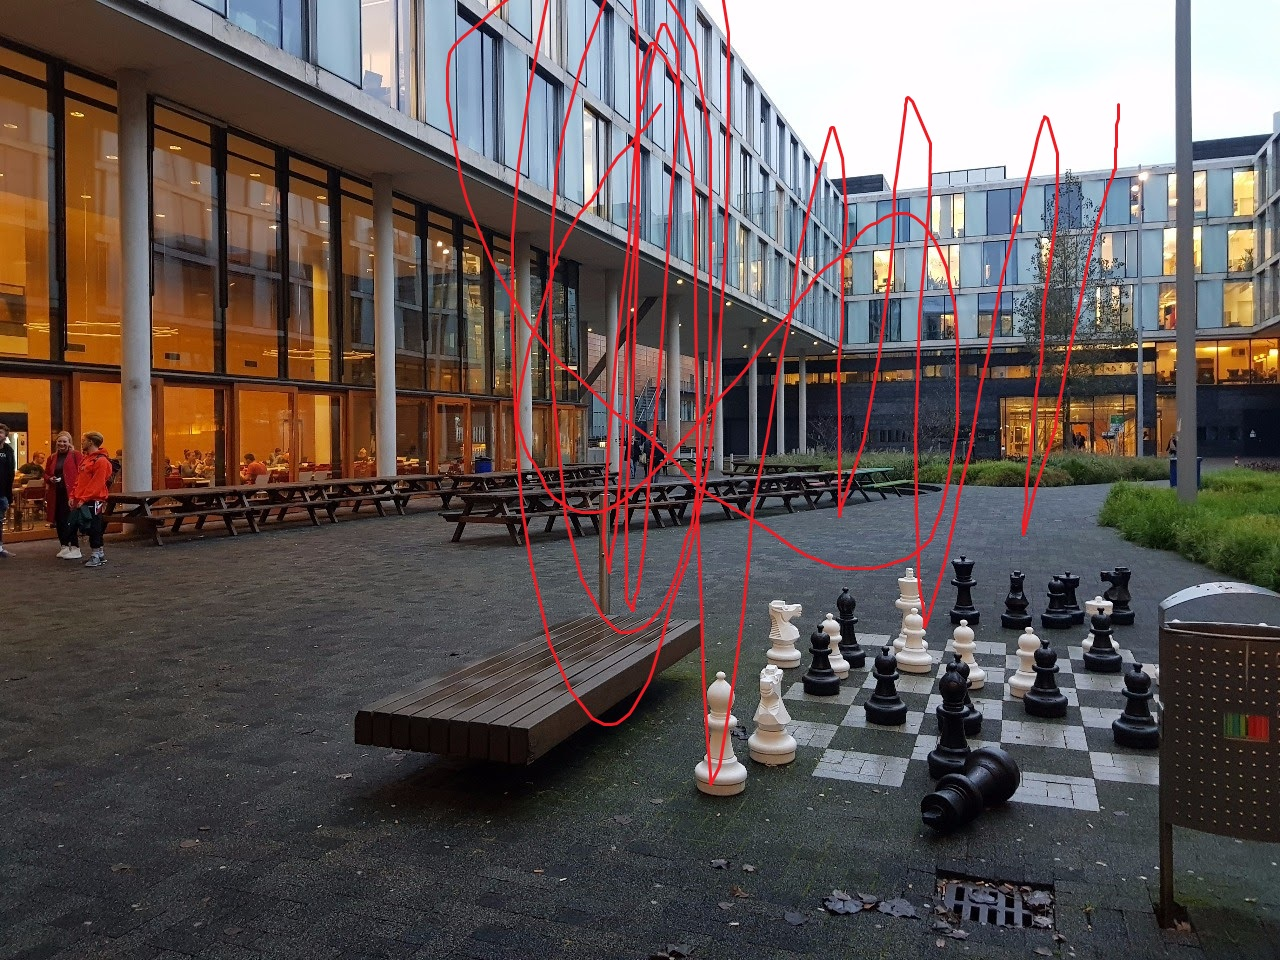




			                                                        _________MASK___________





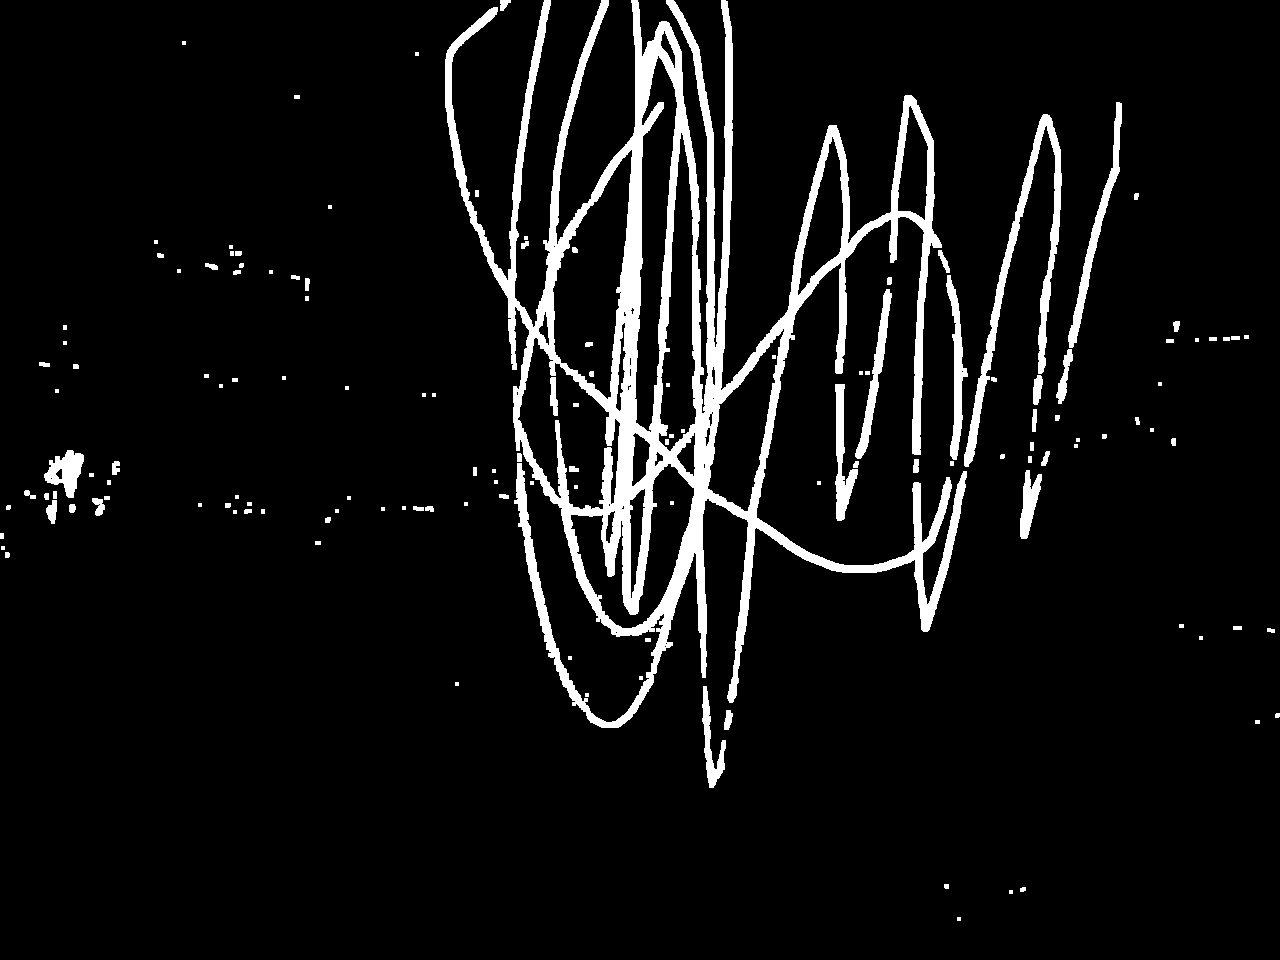




			                                                   _________Converted_Image_INPAINT_Fast_Marching_Method___________





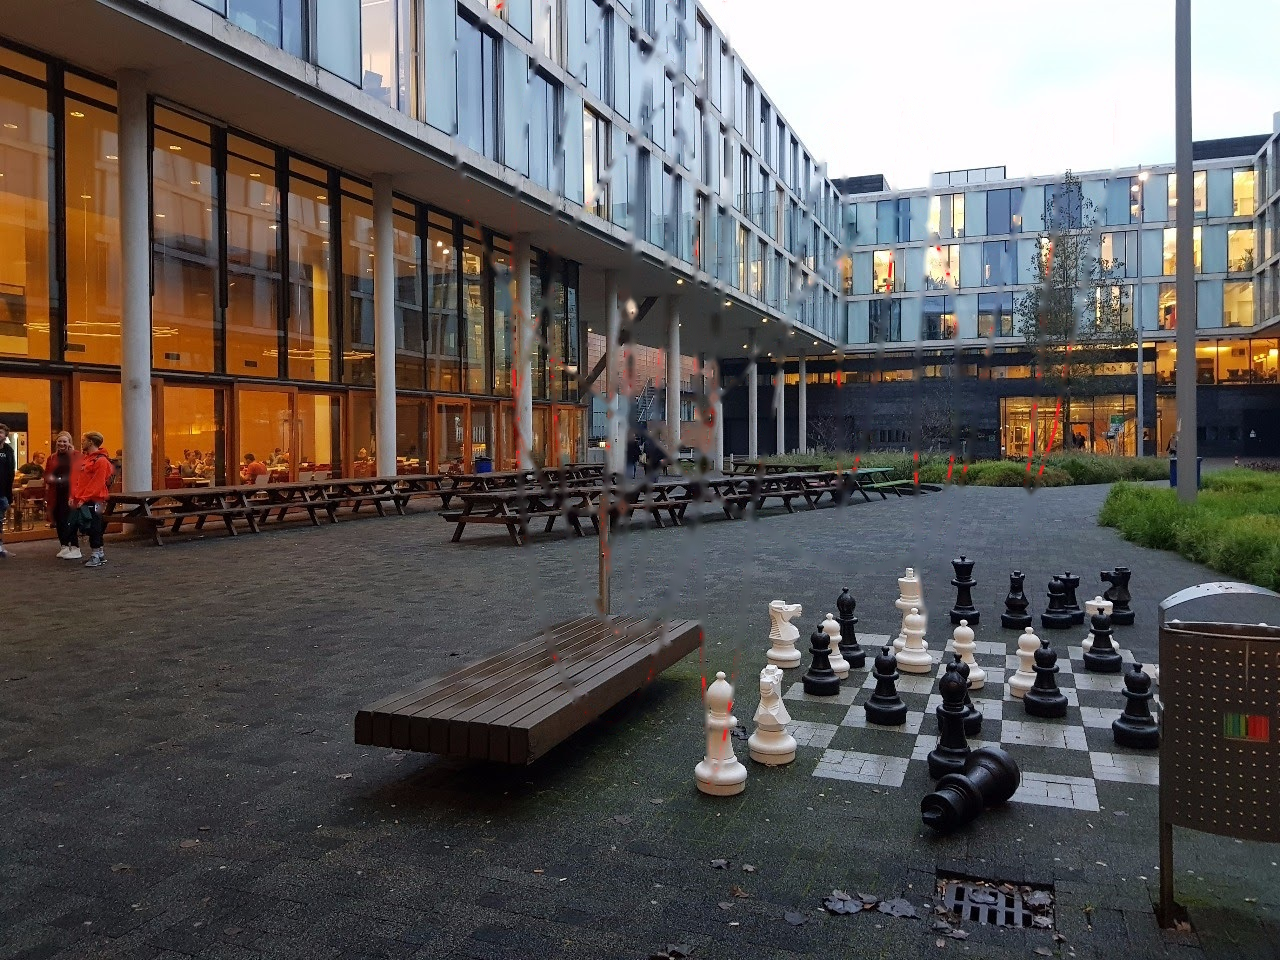




			                                                   _________Converted_Image_INPAINT_Navier-Stokes___________





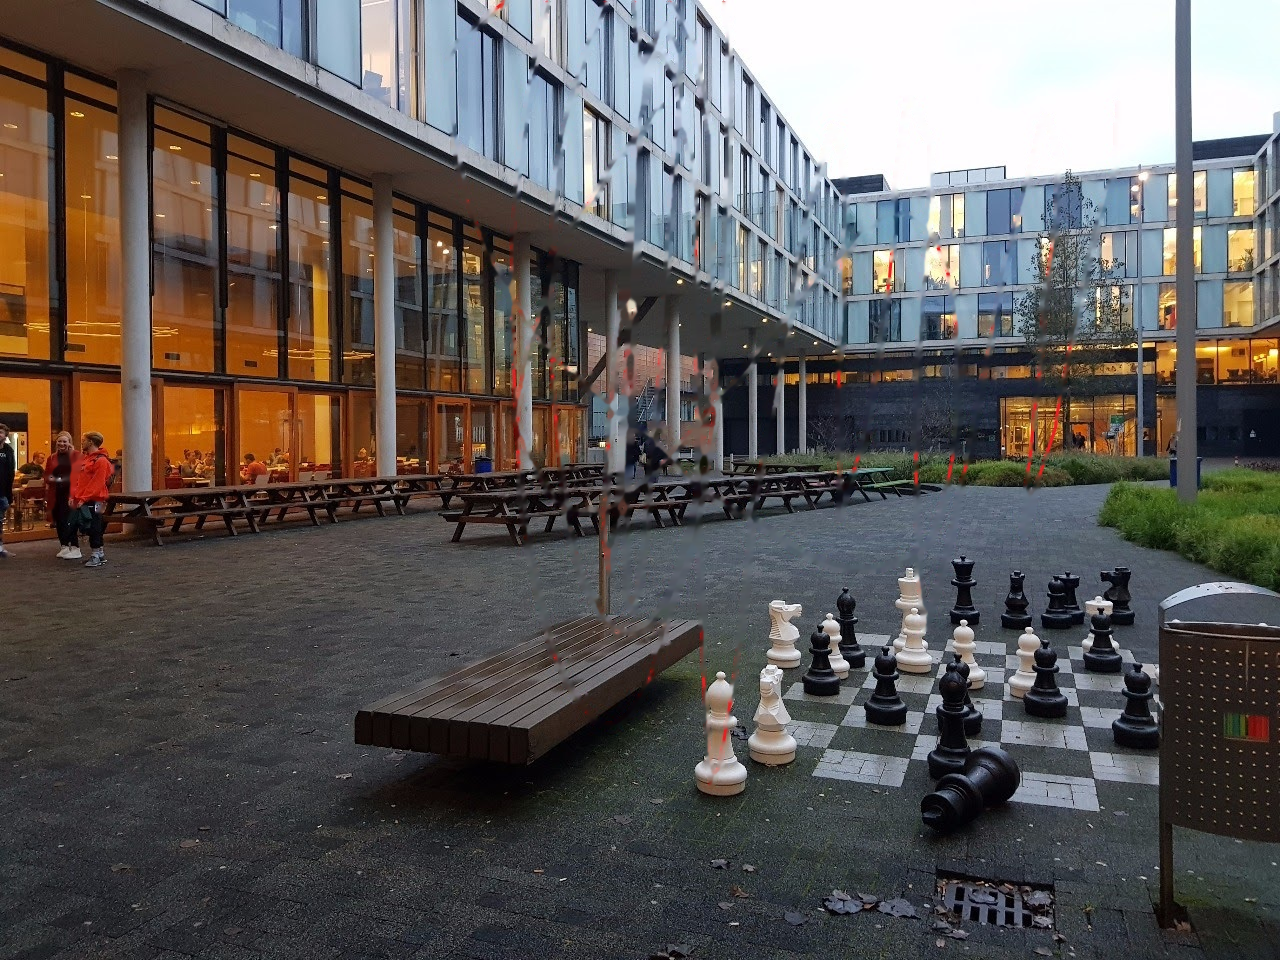

In [5]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# # Load the input image
# img = cv2.imread('/content/abc.jpeg')

from google.colab import files

# Upload the image file
uploaded = files.upload()

# Load the image
img = cv2.imread(list(uploaded.keys())[0])

# Convert the image to the HSV color space
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


x = int(input("Enter Colors :\n 1 - Red \n 2 - Blue \n 3 - Green \n 4 - Black \n 5 - Insert Your Hash Code \n Select your Option : "))
# Define the lower and upper bounds for the specified color in HSV
if x==1:
  lower_red1 = np.array([0, 50, 50])
  upper_red1 = np.array([10, 255, 255])
  lower_red2 = np.array([170, 50, 50])
  upper_red2 = np.array([180, 255, 255])

  # Create a mask for the red lines
  mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
  mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
  mask = cv2.bitwise_or(mask1, mask2)
elif x==2:
  lower_color = np.array([100, 50, 50])
  upper_color = np.array([130, 255, 255])

elif x==3:
  lower_color = np.array([35, 50, 50])
  upper_color = np.array([80, 255, 255])

elif x==4:
  lower_color = np.array([0, 0, 0])
  upper_color = np.array([80, 255, 30])
elif x==5:
# Get user input for the color hash code
  while True:
      print('\n\t Recommended Website for Hash Code : https://html-color.codes/image')
      color_hash = input('\n\n\t  Enter the hash code of the color you want to remove (e.g., #FF0000): ')
      if color_hash[0] == '#' and len(color_hash) == 7:
          break
      print('Invalid input. Please enter a valid six-character hexadecimal value starting with "#".')

  # Convert the color hash code to BGR values
  bgr_color = tuple(int(color_hash[i:i+2], 16) for i in (1, 3, 5))[::-1]
  bgr_color = np.uint8([[bgr_color]])

  print('\n\t  Color in BGR : ',bgr_color)

  # Convert BGR to HSV color space
  hsv_color = cv2.cvtColor(bgr_color, cv2.COLOR_BGR2HSV)

  print('\n\t  Color in HSV : ',hsv_color)

  #Enter threshold
  threshold = int(input('\n\t  Enter the threshold : (e.g., 10,20): '))

  # Define range of color in HSV color space
  hue = hsv_color[0][0][0]
  lower_color = np.array([max(0,hue - threshold), 50, 50])
  upper_color = np.array([min(179,hue + threshold), 255, 255])

  print('\n\n\t  HSV Range for mask from',lower_color,' to ',upper_color)


# Create a mask for the colors other than red
if x!=1:
  mask = cv2.inRange(hsv , lower_color, upper_color)

# Define a structuring element for dilation
kl = int(input('\n\n\t  Enter Structuring element side for mask Dilation : '))
kernel = np.ones((kl, kl), np.uint8)

# Apply dilation to the mask image
mask = cv2.dilate(mask, kernel, iterations=1)

# Apply the mask to remove the green color from the image
result_t = cv2.inpaint(img, mask,5, cv2.INPAINT_TELEA)
result_n = cv2.inpaint(img, mask,5, cv2.INPAINT_NS)


# Apply some post-processing filters to the result image
# result = cv2.medianBlur(result, 5)
# result = cv2.bilateralFilter(result, 9, 75, 75)

# Display the input image, mask, and output image
print('\n\n\n\t\t\t                                                   _________Original_Image___________\n\n\n')
cv2_imshow( img)
print('\n\n\n\t\t\t                                                        _________MASK___________\n\n\n')
cv2_imshow( mask)
print('\n\n\n\t\t\t                                                   _________Converted_Image_INPAINT_Fast_Marching_Method___________\n\n\n')
cv2_imshow( result_t)
print('\n\n\n\t\t\t                                                   _________Converted_Image_INPAINT_Navier-Stokes___________\n\n\n')
cv2_imshow( result_n)
cv2.waitKey(0)
cv2.destroyAllWindows()
